![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [71]:
# Import Required Packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
df=penguins_df
print(df.head())
print(df.info())
#data is clean and there aren't any nulls

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


[[-0.90390586  0.79035987 -1.42534179 -0.56694801  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985  0.99399394]]


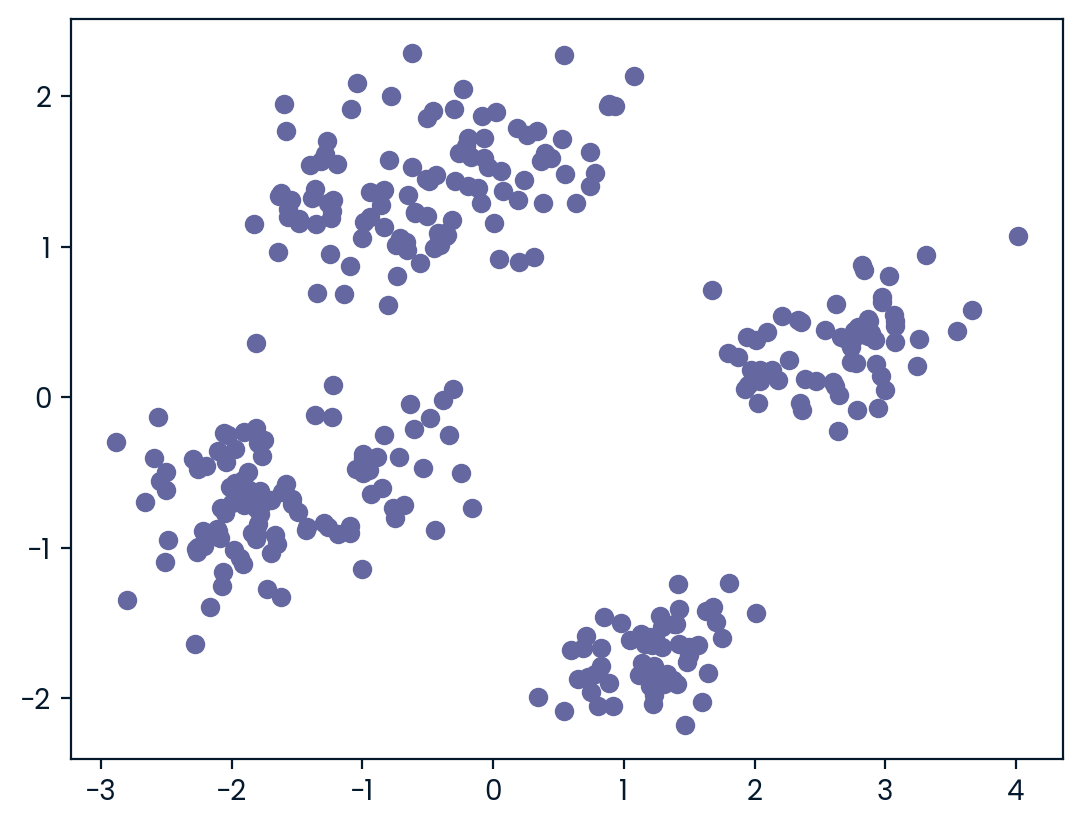

Text(0, 0.5, 'Inertia')

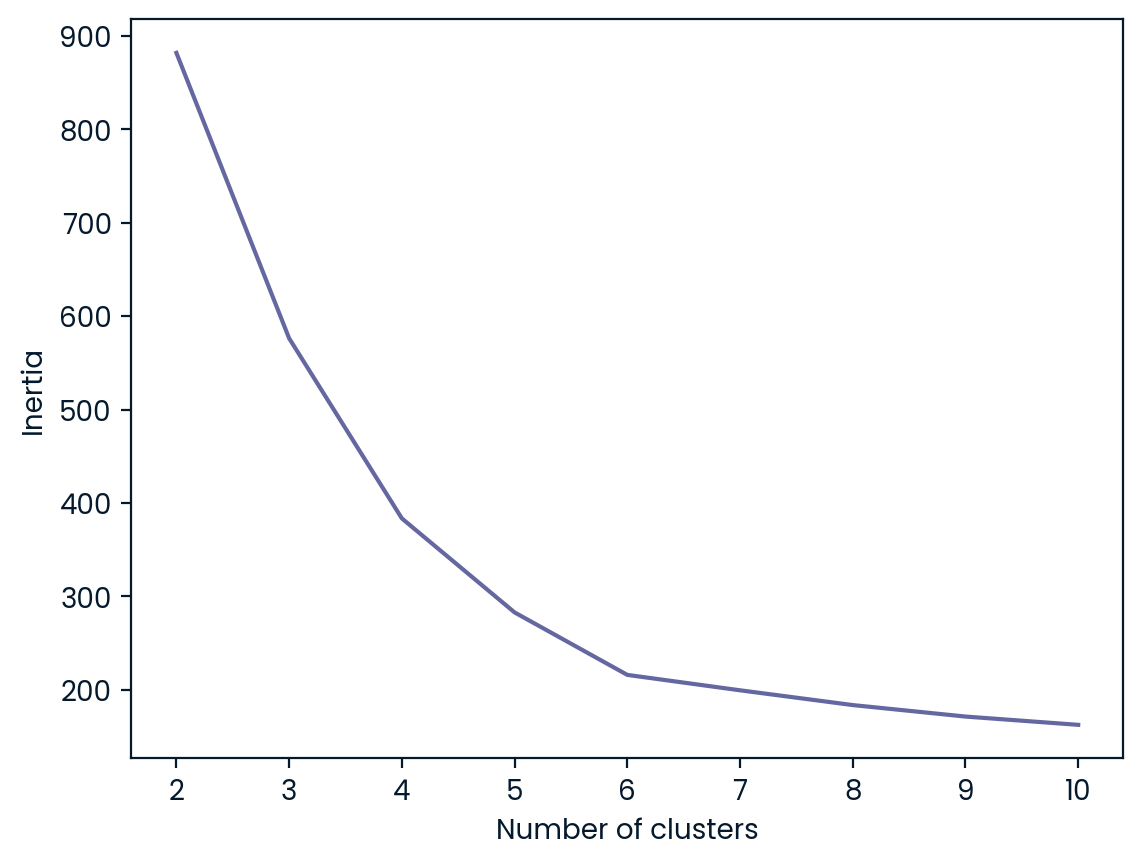

In [72]:
#creating dummy variables out of the 'sex' column
df['sex']=pd.get_dummies(df['sex'], drop_first=True)
#scaling the data
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.values)
print(df_scaled)
#creating Numpy array with all cluster from 2 -> 10 (inclusive)
c_range=np.arange(2, 11, 1)
#initializing inertia array
inertia=[]
#creating a PCA model to easily visualize in a scatterplot
pca=PCA(n_components=2)
penguins_pca=pca.fit_transform(df_scaled)
plt.scatter(penguins_pca[:,0], penguins_pca[:,1])
plt.show()
#visually it should be 4 clusters

for clusters in c_range:
    model=KMeans(n_clusters=clusters)
    model.fit(df_scaled)
    inertia.append(model.inertia_)
plt.plot(c_range, inertia)
plt.xlabel("Number of clusters")
plt.ylabel('Inertia')




     culmen_length_mm  culmen_depth_mm  ...  sex  Cluster
0                39.1             18.7  ...    1        4
1                39.5             17.4  ...    0        0
2                40.3             18.0  ...    0        0
3                36.7             19.3  ...    0        0
4                39.3             20.6  ...    1        4
..                ...              ...  ...  ...      ...
327              47.2             13.7  ...    0        1
328              46.8             14.3  ...    0        1
329              50.4             15.7  ...    1        3
330              45.2             14.8  ...    0        1
331              49.9             16.1  ...    1        3

[332 rows x 6 columns]


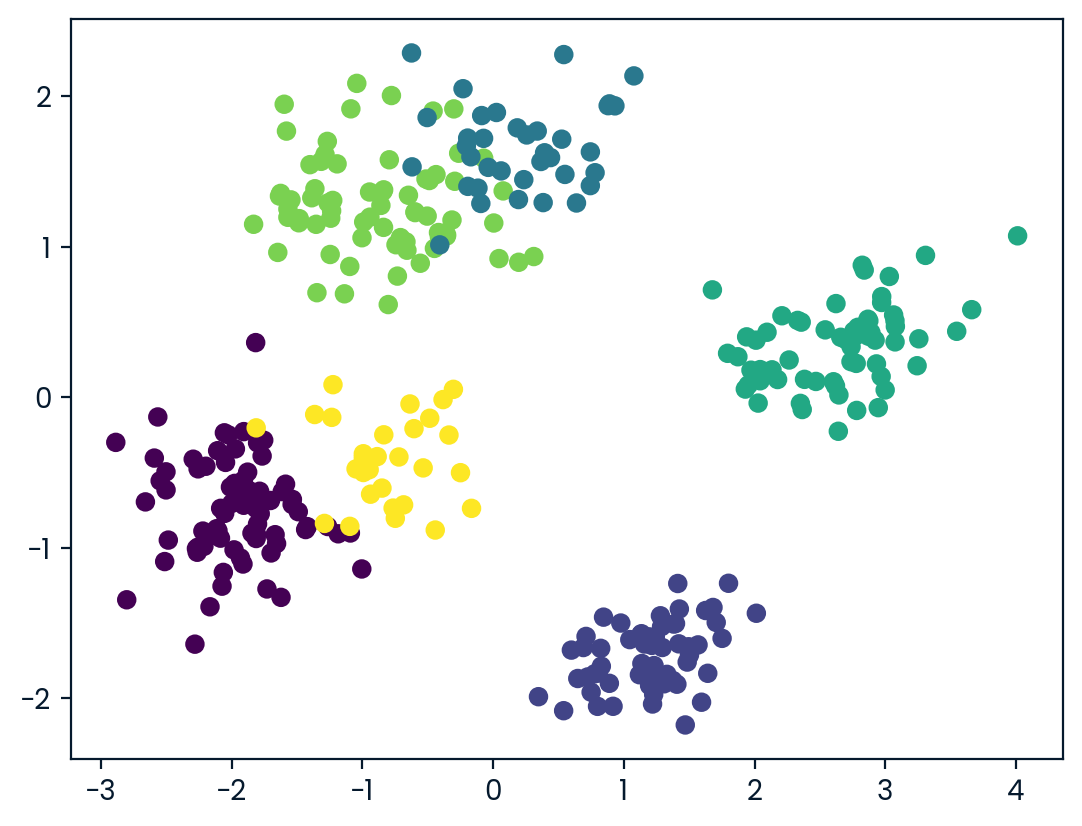

In [73]:
#deciding for the 6 cluster design
model=KMeans(n_clusters=6)
model.fit(df_scaled)
labels=model.predict(df_scaled)
labels=pd.DataFrame(labels, columns=['Cluster'])
#joining the labels and original dataset
df=pd.concat([df, labels], axis=1)
print(df)
plt.scatter(penguins_pca[:,0], penguins_pca[:,1], c=labels.values)
plt.show()


In [74]:
#creating a pivot table for each cluster
stat_penguins=df.groupby("Cluster").mean()
#printing out the means for each cluster
stat_penguins


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
Cluster,,,,,
0,37.580769,17.575641,187.666667,3363.141026,0.0
1,45.563793,14.237931,212.706897,4679.741379,0.0
2,50.805556,19.305556,199.666667,3952.083333,1.0
3,49.473770,15.718033,221.540984,5484.836066,1.0
4,40.315714,19.011429,192.242857,4034.642857,1.0
5,47.310345,17.706897,192.758621,3569.827586,0.0
